In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'1.14.0'

In [2]:
dataset = np.mat([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])
"hello"

'hello'

In [9]:
model = keras.Sequential([
    layers.Dense(2, activation=tf.sigmoid, input_shape=[2])
])
weights = [
    np.array([[-20, 20],
              [20, -20]]),
     np.array([-7, -7])
]
model.set_weights(weights)
model.compile(loss=tf.losses.sigmoid_cross_entropy, optimizer=keras.optimizers.SGD(1))

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 500 == 0: print(epoch, logs['loss'])
            
history = model.fit(
    dataset[:, [0, 1]],
    dataset[:, [2]],
    epochs=10,
    verbose=0,
    callbacks=[PrintDot()]
)
print(model.get_weights())
history.history['loss'][-1]

0 0.5984037518501282
[array([[-20.000572,  19.999428],
       [ 19.999428, -20.000572]], dtype=float32), array([-7.001136, -7.001136], dtype=float32)]


0.5984033942222595

<IPython.core.display.Javascript object>


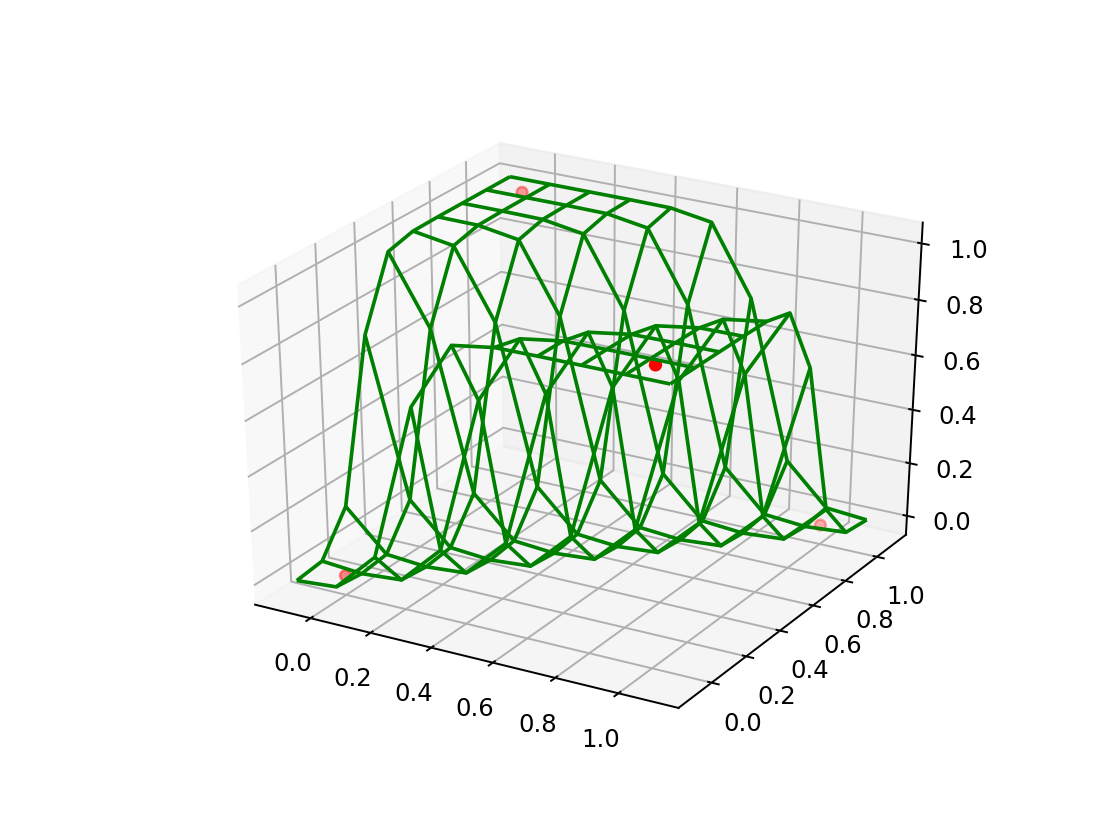

In [10]:
x1_grid, x2_grid = np.meshgrid(np.linspace(-.1, 1.1, 10), np.linspace(-.1, 1.1, 10))
y_grid = np.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
        point = np.mat([[x1_grid[i, j], x2_grid[i, j]]])
        value = model.predict(point)
        y_grid[i, j] = value.max()
        
%matplotlib notebook
ax = plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x1_grid, x2_grid, y_grid, color='green')
ax.scatter(dataset[:, [0]], dataset[:, [1]], dataset[:, [2]], 'o', color='red')